<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 6

Olivia Fan, Frankie Willard, Sam Carpenter

### Problem 0 (3 points)

## Preamble: The MNIST Dataset  

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def standardize(data):
    scaler = StandardScaler().fit(data)
    data = scaler.transform(data).astype(np.float32)
    return data, scaler.mean_, scaler.scale_

In [3]:
def load_mnist():
    digits = datasets.load_digits()
    n, shape = digits.images.shape[0], digits.images.shape[1:]
    xs = digits.images.reshape((n, -1)).astype(np.float32)
    max_pixel = np.max(xs)
    xs, mean, std = standardize(xs)
    ys = digits.target.astype(np.uint8)
    return xs, ys, mean, std, max_pixel, shape

In [4]:
def data_split(xs, ys, test_fraction=0.5):
    x_train, x_test, y_train, y_test = train_test_split(
        xs, ys, test_size=test_fraction, shuffle=True)
    train = {'x': x_train, 'y': y_train}
    test = {'x': x_test, 'y': y_test}
    data = {'train': train, 'test': test}
    return data

In [5]:
def x_to_image(x):
    x = np.round(x * pixel_std + pixel_mean)
    x = np.clip(x * 255. / pixel_max, 0., 255.).astype(np.uint8)
    return np.reshape(x, image_shape)

In [6]:
def show_random_images(xs, ys, rows=3, columns=6):
    rng = np.random.default_rng()
    indices = rng.integers(low=0, high=len(ys), size=rows * columns)
    plt.figure(figsize=(2 * columns, 2.1 * rows), tight_layout=True)
    for plot, index in enumerate(indices):
        image = x_to_image(xs[index])
        plt.subplot(rows, columns, plot + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(ys[index], fontsize=18)
    plt.show()

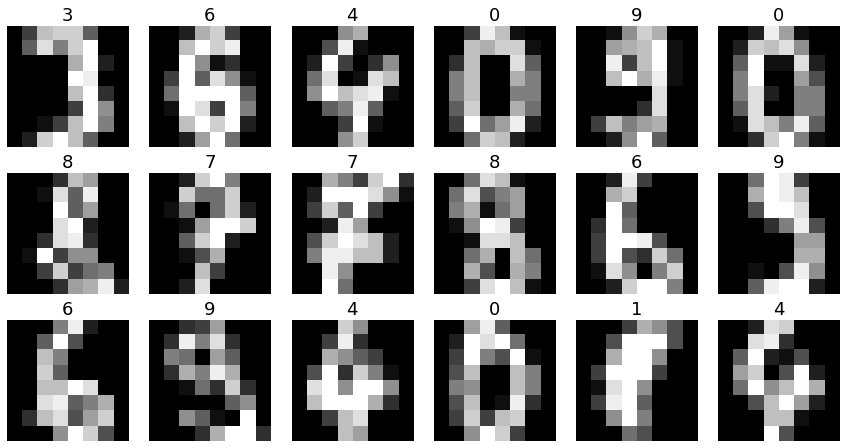

In [7]:
data_points, digit_labels, pixel_mean, pixel_std, pixel_max, image_shape = load_mnist()
show_random_images(data_points, digit_labels)
digit_dataset = data_split(data_points, digit_labels)

## Preamble: Three Classifiers

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

tolerance = 1.e-8
LogReg = LogisticRegression(
    C=1, solver='lbfgs', tol=tolerance,
    max_iter=100000, random_state=0)
LinearSvm = SVC(kernel='linear', tol=tolerance)
RbfSvm = SVC(kernel='rbf', tol=tolerance)

## Part 1: Binary Classifiers

### Problem 1.1

In [9]:
from statistics import mean, stdev

def evaluate(h, data):
    def error_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (1 - predictor.score(x, y)) * 100

    e_train = error_rate(h, data['train'])
    e_test = error_rate(h, data['test'])
    return e_train, e_test

In [10]:
def evaluate_classifiers(xs, ys):
    log_error = []
    lin_error = []
    rbf_error = []
    #compute 10 random splits of the data in xs and ys
    for _ in range (0,10):
        split = data_split(xs,ys)
        train = split['train']
        test = split['test']
        
        #train the classifier on the training portion of the split
        log_classifier = LogReg.fit(train['x'], train['y'])
        lin_svm = LinearSvm.fit(train['x'], train['y'])
        rbf_svm = RbfSvm.fit(train['x'], train['y'])
        
        log_error.append(evaluate(log_classifier, split))
        lin_error.append(evaluate(lin_svm, split))
        rbf_error.append(evaluate(rbf_svm, split))
        
    classifiers = ["Logistic", "Linear SVM", "RBF SVM"]
    for x in classifiers:
        errors = eval(x[:3].lower() + "_error")
        train_error = [error[0] for error in errors]
        test_error = [error[1] for error in errors]
        print("Error statistics for the {my_class} classifier (percent):".format(my_class=x))
        print("Training: min {min}, max {max}, mean {mean}, std {std}".format
          (min=round(min(train_error),3),max=round(max(train_error),3),mean=round(mean(train_error),3), std=round(stdev(train_error),3)))
        print("Testing: min {min}, max {max}, mean {mean}, std {std}".format
          (min=round(min(test_error),3),max=round(max(test_error),3),mean=round(mean(test_error),3), std=round(stdev(test_error),3)))
        print()        

In [11]:
#The subset is the set of all samples whose label is either 3 or 7.
indices = [i for i, x in enumerate(digit_labels) if x == 3 or x == 7]
pair_data_points = [data_points[i] for i in indices]
pair_labels = [digit_labels[i] for i in indices]

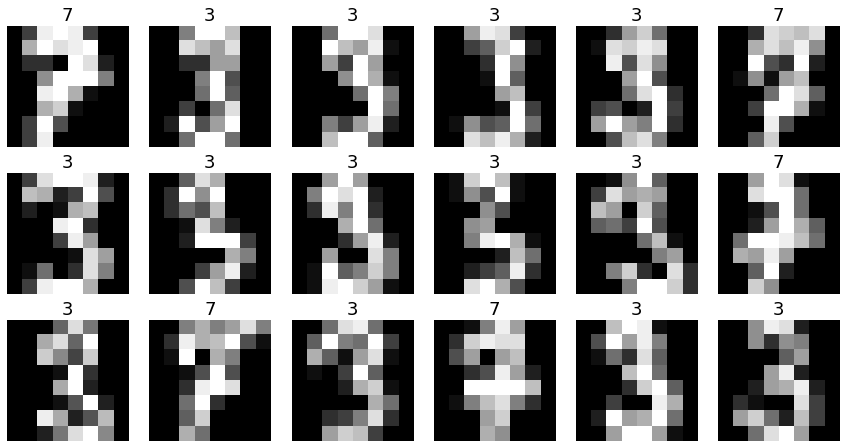

In [12]:
show_random_images(pair_data_points, pair_labels)

In [25]:
evaluate_classifiers(pair_data_points, pair_labels)

Error statistics for the Logistic classifier (percent):
Training: min 0.0, max 0.0, mean 0.0, std 0.0
Testing: min 0.0, max 1.105, mean 0.442, std 0.349

Error statistics for the Linear SVM classifier (percent):
Training: min 0.0, max 0.0, mean 0.0, std 0.0
Testing: min 0.0, max 1.105, mean 0.387, std 0.373

Error statistics for the RBF SVM classifier (percent):
Training: min 0.0, max 0.0, mean 0.0, std 0.0
Testing: min 0.0, max 1.657, mean 0.884, std 0.534



### Problem 1.2 (Exam Style)

All the training sets are linearly separable. As shown above, the maximum training error is 0, therefore the training error is 0 on all training sets. Therefore, the first two linear classifers are able to separate the training sets, and all of the training sets in our ten splits are linearly separable. Because of the small number of samples in the training set, with three significant figures, a value of 0 is not a result of rounding, but means exact zero training error.

### Problem 1.3 (Exam Style)

These experiments are not conclusive, because from running the experiment for multiple times, it is shown that RBF SVM has high variations in test error rate compared to linear SVM, with respect to both standard deviation and the gap between the results using the RBF and linear SVM predictors.
<br> This significant variation might be due to the small number of samples of the training and test set, which leads to more randomness in the training and testing results. For example, two results might both have zero risk but the boundaries could still be placed differently.

### Problem 1.4

In [14]:
odd_indices = [i for i, x in enumerate(digit_labels) if x % 2 != 0]
parity_labels = np.zeros(len(digit_labels))
parity_labels[odd_indices] = 1

In [15]:
side_by_side = np.concatenate((digit_labels.reshape(len(digit_labels),1), parity_labels.reshape(len(parity_labels),1)),1)
print(side_by_side[:20])

[[0. 0.]
 [1. 1.]
 [2. 0.]
 [3. 1.]
 [4. 0.]
 [5. 1.]
 [6. 0.]
 [7. 1.]
 [8. 0.]
 [9. 1.]
 [0. 0.]
 [1. 1.]
 [2. 0.]
 [3. 1.]
 [4. 0.]
 [5. 1.]
 [6. 0.]
 [7. 1.]
 [8. 0.]
 [9. 1.]]


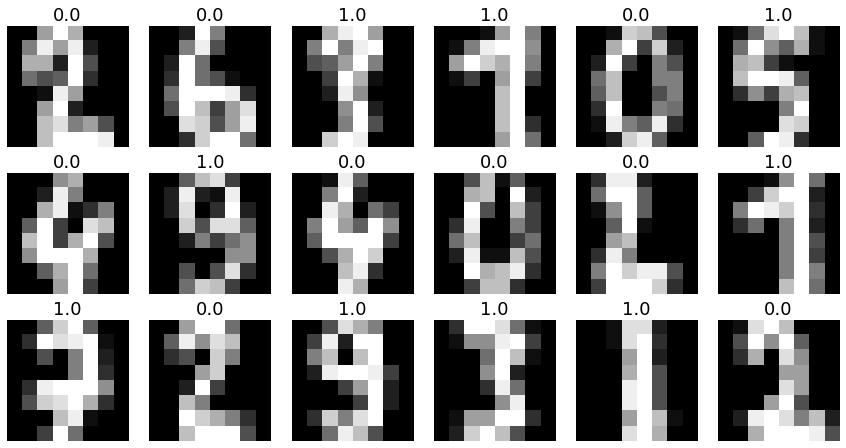

In [16]:
show_random_images(data_points, parity_labels)

In [17]:
evaluate_classifiers(data_points, parity_labels)

Error statistics for the Logistic classifier (percent):
Training: min 5.345, max 7.35, mean 6.214, std 0.567
Testing: min 7.786, max 10.011, mean 8.865, std 0.783

Error statistics for the Linear SVM classifier (percent):
Training: min 4.343, max 7.127, mean 5.757, std 0.744
Testing: min 8.343, max 10.122, mean 9.132, std 0.592

Error statistics for the RBF SVM classifier (percent):
Training: min 0.0, max 0.668, mean 0.356, std 0.18
Testing: min 1.557, max 3.115, mean 2.291, std 0.504



### Problem 1.5 (Exam Style)

The RBF SVM classifier does the best, because there is likely to be a week association between the appearance of digits to their parity (with the apperance being independent of whether the digits are even or odd), therefore linear classifiers might not suffice. The decision boundary between odd and even parities is likely to be complex, which can be handled much better than the RBF SVM classifier as compared to the linear classifiers.

### Problem 1.6 (Exam Style)

The best performer overfits, because the mean test error is larger than the mean training error. The training error is low, while the testing error is much higher.

## Part 2: Margins 

In [18]:
def hyperplane(h):
    return h.intercept_, h.coef_[0]

### Problem 2.1

In [19]:
def show_margins(m, ref_margin, title, font_size=18):
    plt.figure(figsize=(15, 3), tight_layout=True)
    edges = np.logspace(-2, np.log10(max(m)), 50)
    plt.hist(m, bins=edges, rwidth=0.9)
    plt.axvline(ref_margin, color='r', lw=3.)
    title = 'Margin distribution for the {}'.format(title)
    plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.show()

In [20]:
def margins(data, h):
    b, w = hyperplane(h)

    #||w|| = 1/u
    ref_margin = 1 / np.linalg.norm(w)

    #Y_hat
    
    #euclidean distance

    #transform from {0,1} to {-1,1}
    y_pred = 2*h.predict(data)-1

    u_values = [pred * ((np.dot(sample, w) + b) * ref_margin) for sample, pred in zip(data, y_pred)]

    m = np.array(np.ravel(u_values))
    #ref_margin

    return m, ref_margin

In [21]:
def show_all_classifier_margins(dataset):
    #LogReg and LinearSvm
    #train and test
    for classifier_string in ["LogReg", "LinearSvm"]:
        classifier = eval(classifier_string)
        h = classifier.fit(dataset['train']['x'], dataset['train']['y'])
        for split in ["train", "test"]:
            my_data = dataset[split]
            m, ref_margin = margins(my_data['x'], h)
            title = str(classifier_string) + " " + split
            show_margins(m, ref_margin, title)

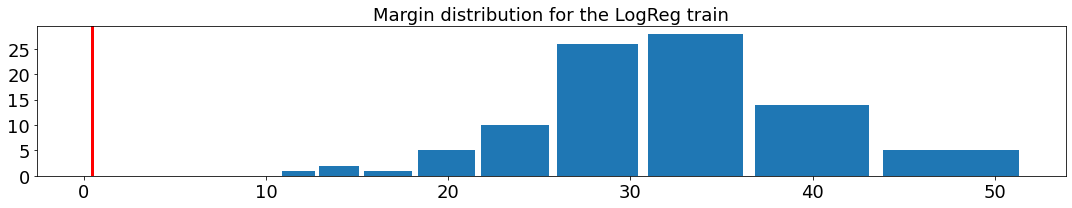

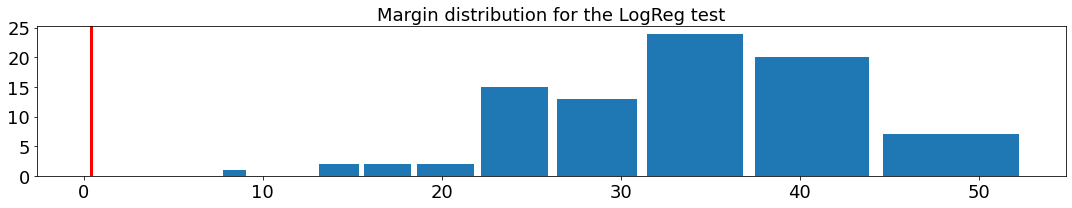

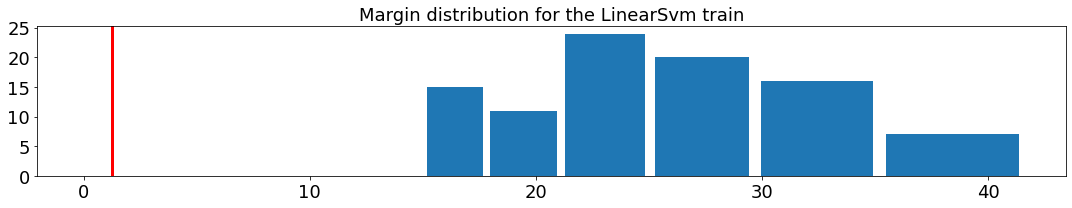

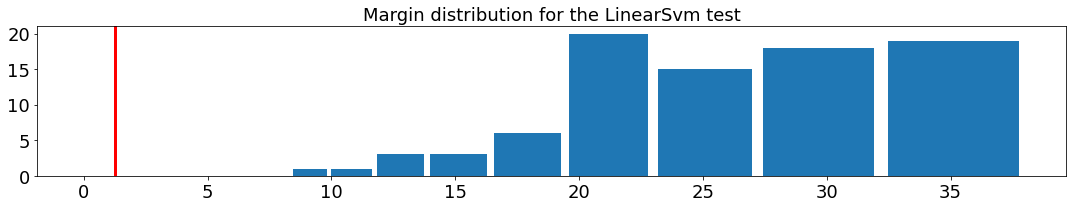

In [22]:
pair_dataset = data_split(pair_data_points, pair_labels)
show_all_classifier_margins(pair_dataset)

### Problem 2.2 (Exam Style)

The data margins for the SVM classifiers seem to be more consistent at staying away from the reference margin, while the logistic regression classfier behave less so. The logistic regression classifier tends to have more data points closer to the reference margin.
<br>This is because SVM classifiers enforce the hinge loss (which incurs a penalty not only for classifying the wrong side, but also penalize the points that fall closely around the margin even if the sample is classified correctly), and therefore a wider reference margin.

### Problem 2.3

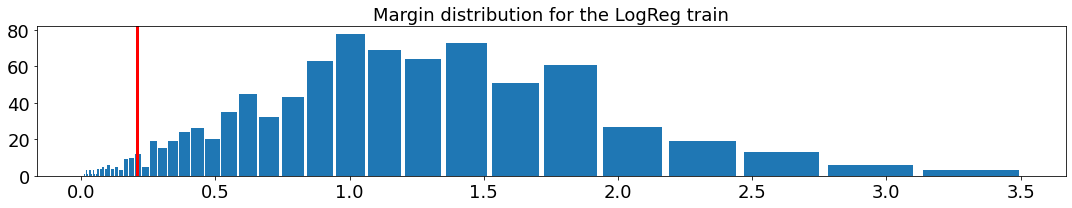

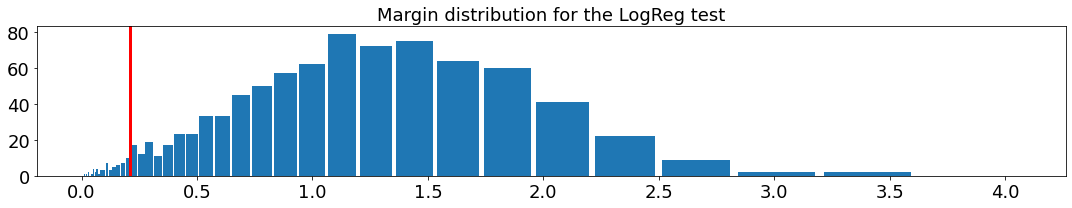

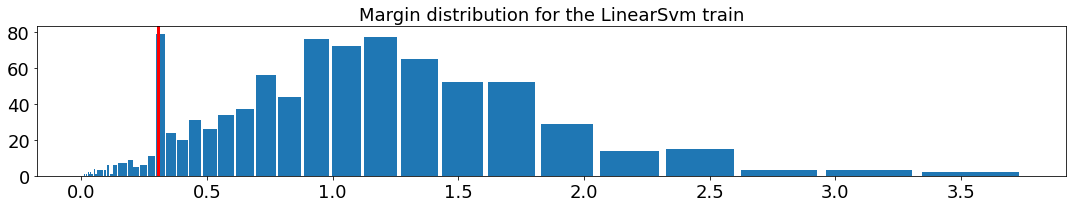

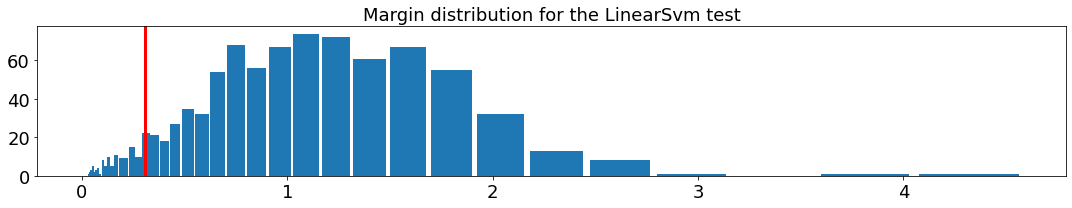

In [23]:
parity_dataset = data_split(data_points, parity_labels)
show_all_classifier_margins(parity_dataset)

### Problem 2.4 (Exam Style)

The bin that includes the SVM classifier reference margin has a lot of values (a large count of data points), because the hinge loss function pushes correctly classfied samples more towards the reference margin by moving and extending the margin to be as large as possible. 
<br> Once a data point is correctly classified, moving it further into the correct decision region does not change the hinge loss because the hinge loss will just be zero. Therefore the data points accumulate at the margin as shown by the bin of a large count of data points in the histogram.

## Part 3: Multiclass Classifiers

### Problem 3.1 (Partially Exam Style)

In [24]:
evaluate_classifiers(data_points, digit_labels)

Error statistics for the Logistic classifier (percent):
Training: min 0.0, max 0.334, mean 0.111, std 0.117
Testing: min 2.892, max 5.117, mean 4.004, std 0.64

Error statistics for the Linear SVM classifier (percent):
Training: min 0.0, max 0.0, mean 0.0, std 0.0
Testing: min 1.78, max 4.004, mean 2.803, std 0.697

Error statistics for the RBF SVM classifier (percent):
Training: min 0.223, max 0.557, mean 0.423, std 0.137
Testing: min 1.669, max 3.448, mean 2.414, std 0.567



Yes, all of the data splits are linearly separable because as shown above, the linear SVM classifier consistently has a maximum of zero risk, therefore zero risk across all the samples. 

<br> Although the logistic regression classifier does not always achieve zero risk, it is likely because it does not converge fully but not due to the linear separability of the data (as the linear SVM is already able to achieve zero risk rate). There are signs of lack of convergence (some warnings previously displayed), which could potentially be fixed by tuning hyperparameters (including reducing the inverse of regularization strength C or updating the solver to be first order such as hessian-approx), but these come with potential tradeoffs in the bias-variance tradeoff as well as computation time.

The RBF SVM classifier does the best, because it has the smallest testing error, however, this conclusion is not reliable it does better only by a small margin over the linear SVM classifier.